In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import operator
from functools import reduce

In [2]:
np.random.seed(1)

In [3]:
def sigmoid(x):
    """
    计算x的sigmoid函数值
    :param x: 一个标量或任意大小的numpy数组
    :return: sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s

In [4]:
def load_planar_dataset():
    """
    加载一组二维数据集
    :return: X, Y
    """
    np.random.seed(1)
    m = 400 # 样本的数量
    N = m // 2 # 每一类的样本数量
    D = 2 # 维度
    X = np.zeros((m, 2)) # 数据矩阵，每一行都是一个样本
    Y = np.zeros((m, 1), dtype='uint8') # 标签向量(0表示红色，1表示蓝色)
    a = 4 # 花的最大光线

    for j in range(2):
        ix = range(N*j, N*(j+1))
        theta = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N) * 0.2
        r = a * np.sin(4*theta) + np.random.randn(N) * 0.2 # 半径值
        X[ix] = np.c_[r*np.sin(theta), r*np.cos(theta)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

In [5]:
def load_extra_datasets():
    """
    加载数据集
    :return: noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
    """
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [6]:
def plot_decision_boundary(model, X, y):
    """
    绘制决策边界
    :param model: 进行分类的所使用的模型
    :param X: 样本变量值
    :param y: 样本标签值
    """
    # 设置X, y的最大最小值
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # 以h为间隔划分区间[x_min, x_max]为xx，yy同理
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    # 预测整个网格上的函数值
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制轮廓线
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) # 等位线
    plt.ylabel("x2")
    plt.xlabel("x1")
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [7]:
X, Y = load_planar_dataset() # 载入数据集

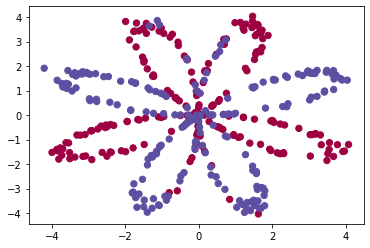

In [8]:
plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, Y), s=40, cmap=plt.cm.Spectral)

In [9]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print(f"The shape of X is: {str(shape_X)}")
print(f"The shape of Y is: {str(shape_Y)}")
print("I have m = %d training examples!" % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [10]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

d:\Program Files\Python\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


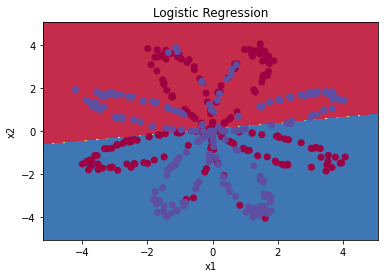

In [11]:
# 绘制决策边界
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

# 准确率 accuracy
LR_predictions = clf.predict(X.T)
print("Accuracy of logistic regression: %d " % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size)*100) +
        "% " + "(percentage of correctly labelled datapoints)")

In [12]:
def layer_sizes(X, Y, n_h = 4):
    """
    计算某一个网络的尺寸大小
    :param X: 输入样本特征
    :param Y: 输出标签
    :return: (n_x, n_h, n_y) 分别为输入层的尺寸，隐藏层的尺寸，输出层的尺寸
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

In [13]:
def layer_sizes_test_case():
    """layer_sizes函数的测试样例"""
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

In [14]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print(f"The size of the input layer is: n_x = {str(n_x)}")
print(f"The size of the hidden layer is: n_h = {str(n_h)}")
print(f"The size of the output layer is: n_y = {str(n_y)}")

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [15]:
def initialize_parameters(n_x, n_h, n_y):
    """
    随机初始化参数
    :param n_x: 输入层的尺寸
    :param n_h: 隐藏层的尺寸
    :param n_y: 输出层的尺寸
    :return: parameters 初始化后的参数
    """
    np.random.seed(2)

    # 初始化权重参数
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    # 判断参数W1, b1, W2, b2的形状大小是否异常
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
    return parameters

In [16]:
def initialize_parameters_test_case():
    """随机初始化参数函数的样例测试"""
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

In [17]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print(f"W1 = {str(parameters['W1'])}")
print(f"b1 = {str(parameters['b1'])}")
print(f"W2 = {str(parameters['W2'])}")
print(f"b2 = {str(parameters['b2'])}")

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [18]:
def forward_propagation(X, parameters):
    """
    前向传播函数
    :X: 输入层的尺寸
    :parameters: 隐藏层的尺寸
    :return: A2, cache
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return (A2, cache)

In [19]:
def forward_propagation_test_case():
    """前向传播函数测试样例"""
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
    'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
    'b2': np.array([[ 0.]])}
    return X_assess, parameters

In [20]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419913 -0.0004969633532317802 0.0004381874509591466 0.500109546852431


In [21]:
def compute_cost(A2, Y):
    """
    计算损失函数损失值
    :A2: 输出层的输出值
    :Y: 原始样本数据的标签值
    """
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), (np.log(1-A2)))
    
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost)

    assert(isinstance(cost, float))
    
    return cost

In [22]:

def compute_cost_test_case():
    """计算损失值的测试样例"""
    np.random.seed(1)
    Y_assess = np.random.randn(1, 3)

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return a2, Y_assess

In [23]:
A2,  Y_assess = compute_cost_test_case()

print(f"cost = {str(compute_cost(A2, Y_assess))}")

cost = 0.6929198937761265


In [24]:
def backward_propagation(parameters, cache, X, Y):
    """
    反向传播函数
    :cache: 参数梯度值
    :parameters: 参数
    :X: 样本特征值
    :Y: 样本标签值
    :return: grads - 梯度值
    """

    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads

In [25]:
def backward_propagation_test_case():
    """反向传播函数测试样例"""
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
    'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
    'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
    'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
    'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
    'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
    'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    
    return parameters, cache, X_assess, Y_assess

In [26]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(X_assess.shape)
print(Y_assess.shape)

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

(4, 2)
(1, 4)
(2, 3)
(1, 3)
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [27]:
def update_parameters(parameters, grads, learning_rate=1.0):
    """
    更新参数函数
    :parameters: 参数
    :grads: 梯度
    :learning_rate: 学习率
    :return: parameters - 更新后的参数
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
    return parameters

In [28]:
def update_parameters_test_case():
    """更新参数函数测试样例"""
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
    'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
    'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
    'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
    'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
    'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
    'db2': np.array([[ -1.08923140e-05]])}
    
    return parameters, grads

In [29]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print(f"W1 = {str(parameters['W1'])}")
print(f"b1 = {str(parameters['b1'])}")
print(f"W2 = {str(parameters['W2'])}")
print(f"b2 = {str(parameters['b2'])}")

W1 = [[-0.00638361  0.01895633]
 [-0.02394014  0.03837897]
 [-0.01660339 -0.02038905]
 [ 0.01028293 -0.05828154]]
b1 = [[-1.00309354e-06]
 [ 1.19737658e-05]
 [ 7.94965778e-07]
 [-3.09207480e-06]]
W2 = [[-0.01041433 -0.04389238  0.01732894  0.0469597 ]]
b2 = [[0.00010239]]


In [30]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    浅层神经网络模型主函数
    :X: 样本特征值
    :Y: 样本标签值
    :n_h: 隐藏层尺寸大小
    :num_iterations: 迭代次数
    :print_cost: 是否展示代价值
    :return: parameters - 更新后的参数
    """
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    n_x, n_h, n_y = layer_sizes(X, Y, n_h)
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters        

In [31]:
def nn_model_test_case():
    """浅层神经网络函数测试样例"""
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = np.random.randn(1, 3)
    
    return X_assess, Y_assess

In [32]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


W1 = [[-4.12827289  5.21297749]
 [-7.37261157  1.23586072]
 [-4.12284994  5.21636449]
 [ 7.37260125 -1.23585914]]
b1 = [[ 2.28544853]
 [ 3.71481566]
 [ 2.28561998]
 [-3.71481058]]
W2 = [[-5028.11104177 -5006.68633379 -5027.1068594   5006.61839425]]
b2 = [[-43.9836107]]


In [33]:
def predict(X, parameters):
    """
    预测函数
    :X: 样本特征值
    :parameters: 参数值
    :return: predictions - 预测值
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = np.array( [1 if x >0.5 else 0 for x in A2.reshape(-1,1)] ).reshape(A2.shape)

    return predictions

In [34]:
def predict_test_case():
    """预测函数测试样例"""
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
            [-0.02311792,  0.03137121],
            [-0.0169217 , -0.01752545],
            [ 0.00935436, -0.05018221]]),
            'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
            'b1': np.array([[ -8.97523455e-07],
            [  8.15562092e-06],
            [  6.04810633e-07],
            [ -2.54560700e-06]]),
            'b2': np.array([[  9.14954378e-05]])}

    return parameters, X_assess

In [35]:
a = np.array([0, 2, 1, 3, 5, 7, 6, 5])
b = np.array([1 if x>3 else 0 for x in a.reshape(-1, 1)])
b = b.reshape(a.shape)
b

array([0, 0, 0, 0, 1, 1, 1, 1])

In [36]:
X_assess, parameters = predict_test_case()
predictions = predict(parameters, X_assess)
print(f"predictions mean = {str(np.mean(predictions))}")

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.292290
Cost after iteration 2000: 0.276357
Cost after iteration 3000: 0.240835
Cost after iteration 4000: 0.231060
Cost after iteration 5000: 0.226024
Cost after iteration 6000: 0.222677
Cost after iteration 7000: 0.220185
Cost after iteration 8000: 0.218208
Cost after iteration 9000: 0.216588
Cost after iteration 10000: 0.215238
Cost after iteration 11000: 0.214101
Cost after iteration 12000: 0.213132
Cost after iteration 13000: 0.212297
Cost after iteration 14000: 0.214466
Cost after iteration 15000: 0.214464
Cost after iteration 16000: 0.214321
Cost after iteration 17000: 0.214118
Cost after iteration 18000: 0.213895
Cost after iteration 19000: 0.213673


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

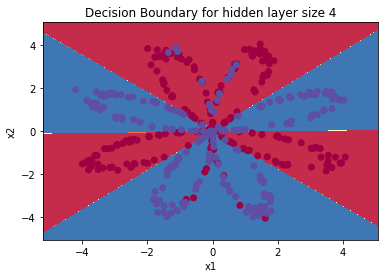

In [37]:
parameters = nn_model(X, Y, n_h=4, num_iterations=20000, print_cost=True)

plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y.ravel())

plt.title('Decision Boundary for hidden layer size 4')

In [38]:
predictions = predict(X, parameters)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%


Accuracy for 1 hidden units: 67.25 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.0 %
Accuracy for 20 hidden units: 91.0 %
Accuracy for 50 hidden units: 90.75 %


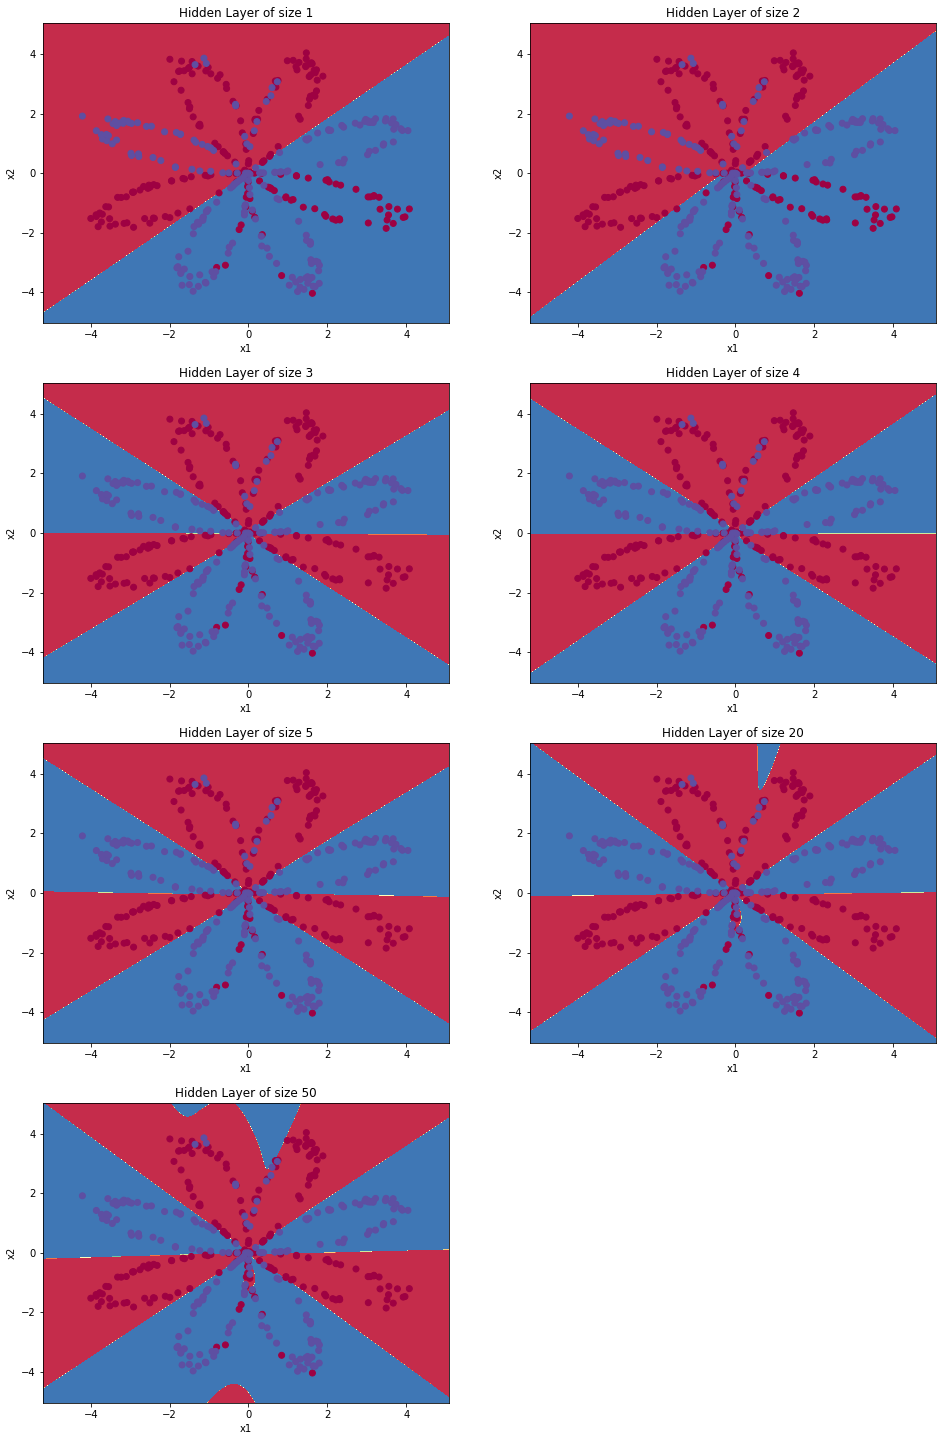

In [39]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y.ravel())
    predictions = predict(X, parameters)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print(f"Accuracy for {n_h} hidden units: {accuracy} %")

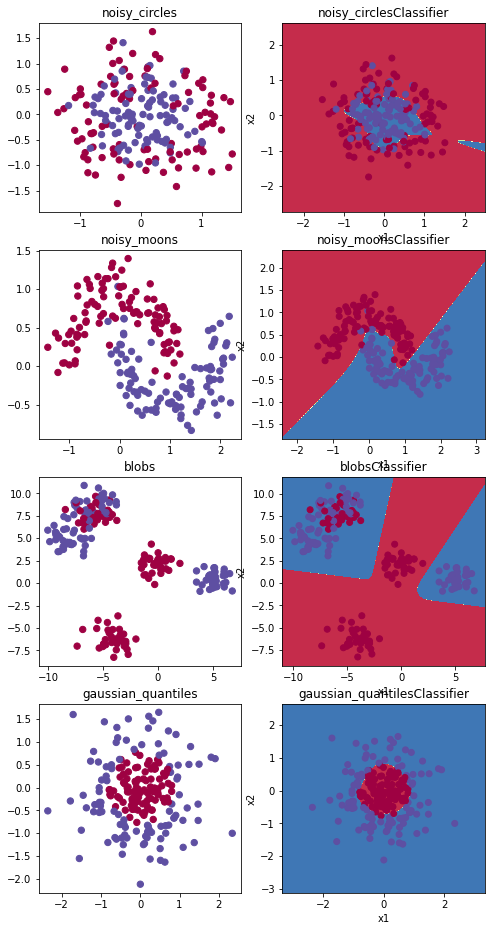

In [40]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

i = 0
plt.figure(figsize=(8, 16))
for dataset in datasets:
    plt.subplot(4, 2, i+1)
    i += 1
    plt.title(dataset)

    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])

    if dataset == "blobs":
        Y = Y % 2

    plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, Y), s=40, cmap=plt.cm.Spectral) 

    parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=False)

    plt.subplot(4, 2, i+1)
    i += 1
    plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y.ravel())
    plt.title(f'{dataset}Classifier')